In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import eksplisitt as eks
import ImageView as imv
%matplotlib inline

In [12]:
def Inpainting(file):
    orig_im = imageio.imread(file)
    im=np.copy(orig_im)
    im = np.sum(im.astype(float), 2) / (3 * 255)  #gråtone
    img = np.copy(im)
    im[im < 0] = 0                                 # klipp til lovlige verdier
    im[im > 1] = 1

    mask = np.ones(im.shape)     #lag maske
    mask[350:400 ,450:550] = 0
    mask[500:650 ,300:500] = 0
    mask[200:300 ,700:800] = 0
    mask = mask.astype(bool)
    im=eks.eksplisitt(im, n=20)  #løs

    im[mask] = img[mask]         #ja
    
    imv.viewInpaint(img, mask, im, "Inpainting", False)

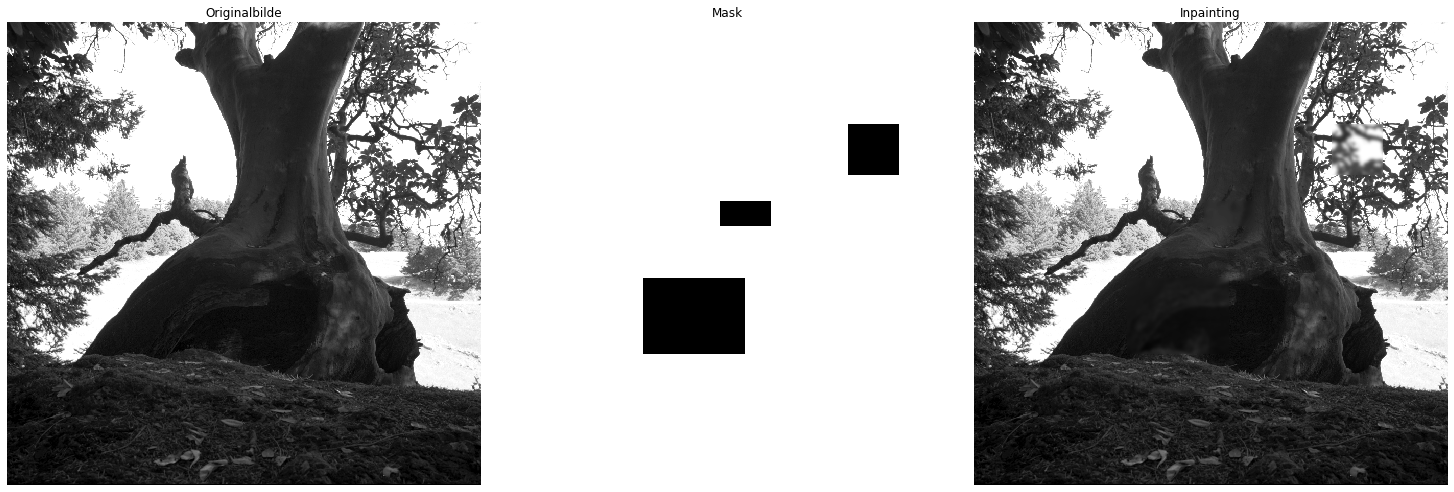

In [13]:
file='../hdr-bilder/Tree/Tree_00032.png'
Inpainting(file)

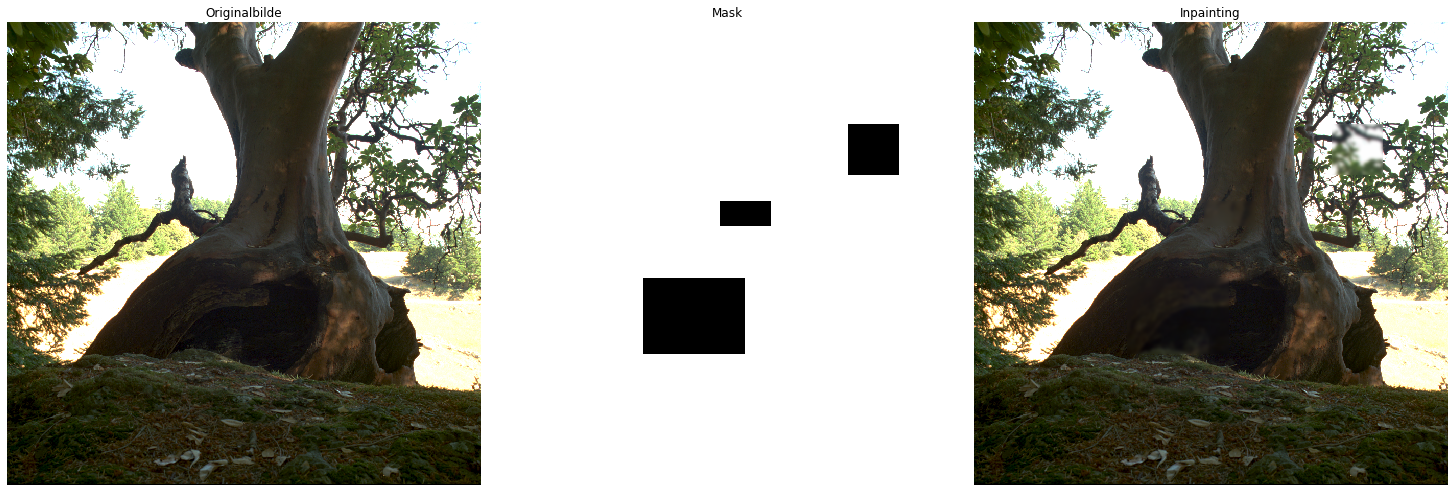

In [15]:
def Inpainting_rgb(file):
    orig_im = imageio.imread(file)
    im=np.copy(orig_im)
    im = im.astype(dtype=float) / 255
    gray_im =np.sum(im.astype(float), 2) / (3 * 255)  #gråtone trengs for å vise masken
    img = np.copy(im)
    im[im < 0] = 0                # klipp til lovlige verdier
    im[im > 1] = 1

    mask = np.ones(gray_im.shape)     #lag maske
    mask[350:400 ,450:550] = 0
    mask[500:650 ,300:500] = 0
    mask[200:300 ,700:800] = 0
    mask = mask.astype(bool)     #lag bool-array

    im=eks.eksplisitt(im, n=20)  #løs
    
    im[mask] = img[mask]         #ja
    imv.viewInpaint(orig_im, mask, im, "Inpainting", True)
    
Inpainting_rgb(file)
